In [5]:
!pip install finance-datareader
!pip install fbprophet

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 3.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.7/922.7 KB 4.6 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [134]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

# 주식 데이터를 불러올 종목과 기간을 설정합니다.
# stock_symbol = '453810.KS'  # 삼성 nifty50
# stock_symbol = 'MSFT'  # Microsoft
# stock_symbol = 'MMM'  # 3M
stock_symbol = 'QQQ'  # QQQ
start_date = '2021-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')

# 주식 데이터를 불러옵니다.
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
stock_data = stock_data.asfreq('B')

# prophet은 목표값 y와 날짜 ds 컬럼이 꼭 필요하다.
stock_data["y"] = stock_data["Close"]
stock_data["ds"] = stock_data.index
stock_data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,y,ds
Date,,,,,,,,
2024-03-04,445.609985,446.040009,443.769989,444.019989,444.019989,34325700.0,444.019989,2024-03-04
2024-03-05,440.940002,440.950012,433.649994,436.049988,436.049988,57917100.0,436.049988,2024-03-05
2024-03-06,440.320007,441.989990,436.890015,438.790009,438.790009,46234500.0,438.790009,2024-03-06
2024-03-07,442.420013,446.720001,440.859985,445.450012,445.450012,44526700.0,445.450012,2024-03-07
2024-03-08,445.809998,448.640015,438.339996,439.019989,439.019989,71954300.0,439.019989,2024-03-08


In [87]:
stock_data.iloc[-30:]

,Open,High,Low,Close,Adj Close,Volume,y,ds
Date,,,,,,,,
2024-01-25,404.320007,407.010010,402.529999,404.869995,404.122681,21021200.0,404.869995,2024-01-25
2024-01-26,404.369995,406.170013,402.429993,403.929993,403.184418,17803300.0,403.929993,2024-01-26
2024-01-29,406.059998,409.980011,404.329987,409.720001,408.963715,24510200.0,409.720001,2024-01-29
2024-01-30,412.260010,413.049988,406.450012,408.589996,407.835815,33477600.0,408.589996,2024-01-30
2024-01-31,406.959991,415.320007,397.209991,397.579987,396.846130,47871100.0,397.579987,2024-01-31
2024-02-01,401.829987,408.000000,401.799988,403.779999,403.034698,30657700.0,403.779999,2024-02-01
2024-02-02,403.809998,412.649994,403.559998,411.220001,410.460968,28245000.0,411.220001,2024-02-02
2024-02-05,409.899994,411.160004,403.989990,405.649994,404.901245,25352300.0,405.649994,2024-02-05
2024-02-06,405.880005,407.970001,402.910004,405.489990,404.741516,18382600.0,405.489990,2024-02-06


In [135]:
from prophet import Prophet

m = Prophet()
# m.fit(stock_data.iloc[:-30])
m.fit(stock_data)
periods = 30
future = m.make_future_dataframe(periods=periods, freq='B')
future.tail(15)

15:02:58 - cmdstanpy - INFO - Chain [1] start processing
15:02:58 - cmdstanpy - INFO - Chain [1] done processing


,ds
815,2024-04-01
816,2024-04-02
817,2024-04-03
818,2024-04-04
819,2024-04-05
820,2024-04-08
821,2024-04-09
822,2024-04-10
823,2024-04-11
824,2024-04-12


In [136]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-04,319.817406,302.825481,327.447622,319.817406,319.817406,-4.251837,-4.251837,-4.251837,2.519312,2.519312,2.519312,-6.771148,-6.771148,-6.771148,0.0,0.0,0.0,315.565569
1,2021-01-05,319.832203,303.714039,326.387376,319.832203,319.832203,-4.879047,-4.879047,-4.879047,2.137696,2.137696,2.137696,-7.016744,-7.016744,-7.016744,0.0,0.0,0.0,314.953156
2,2021-01-06,319.847001,303.347933,326.254803,319.847001,319.847001,-5.180228,-5.180228,-5.180228,2.104261,2.104261,2.104261,-7.284489,-7.284489,-7.284489,0.0,0.0,0.0,314.666772
3,2021-01-07,319.861798,302.273857,326.279192,319.861798,319.861798,-5.215096,-5.215096,-5.215096,2.350544,2.350544,2.350544,-7.565640,-7.565640,-7.565640,0.0,0.0,0.0,314.646702
4,2021-01-08,319.876596,302.829791,326.668957,319.876596,319.876596,-5.394192,-5.394192,-5.394192,2.456405,2.456405,2.456405,-7.850597,-7.850597,-7.850597,0.0,0.0,0.0,314.482404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,2024-04-15,450.744258,453.704917,477.463937,448.008987,452.502223,15.055579,15.055579,15.055579,2.519312,2.519312,2.519312,12.536268,12.536268,12.536268,0.0,0.0,0.0,465.799837
826,2024-04-16,451.118152,452.035357,477.239412,448.196788,453.046995,14.258484,14.258484,14.258484,2.137696,2.137696,2.137696,12.120788,12.120788,12.120788,0.0,0.0,0.0,465.376636
827,2024-04-17,451.492046,452.475363,476.650378,448.378020,453.558148,13.743604,13.743604,13.743604,2.104261,2.104261,2.104261,11.639344,11.639344,11.639344,0.0,0.0,0.0,465.235651
828,2024-04-18,451.865941,452.692556,476.898857,448.370076,454.059536,13.445746,13.445746,13.445746,2.350544,2.350544,2.350544,11.095202,11.095202,11.095202,0.0,0.0,0.0,465.311687


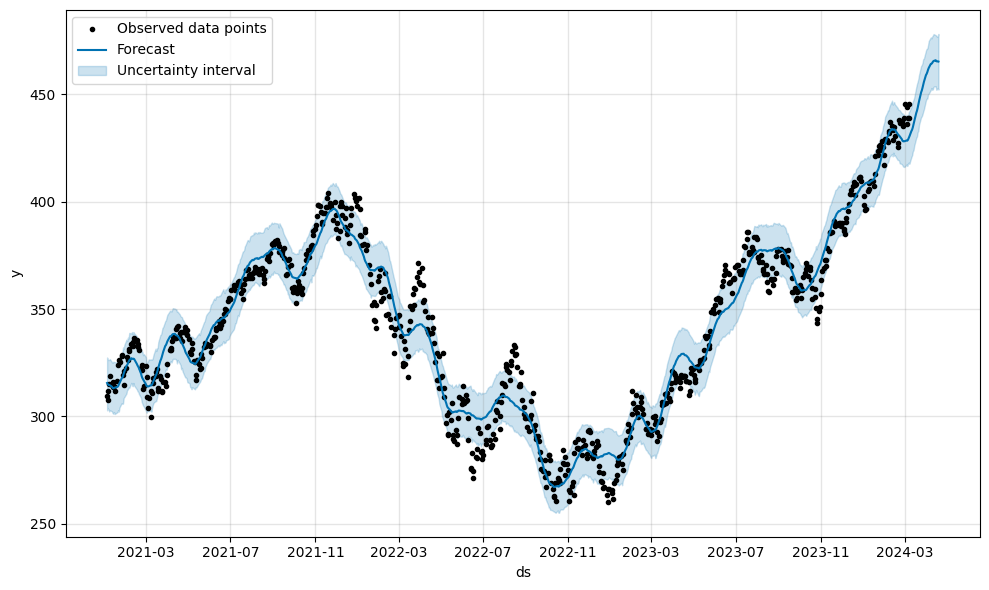

In [137]:
fig = m.plot(forecast, include_legend=True)

In [127]:
forecast.iloc[-1]

ds                            2024-04-18 00:00:00
trend                                  425.125131
yhat_lower                             429.585716
yhat_upper                             454.361362
trend_lower                            421.663245
trend_upper                            429.413545
additive_terms                          16.603116
additive_terms_lower                    16.603116
additive_terms_upper                    16.603116
weekly                                   2.185703
weekly_lower                             2.185703
weekly_upper                             2.185703
yearly                                  14.417412
yearly_lower                            14.417412
yearly_upper                            14.417412
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                   441.728246
Name: 828, dtype: object

In [ ]:
# # 예측 결과를 시각화합니다.
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='Actual Prices')
plt.plot(test_data.index, forecast, color='red', label='Predicted Prices')
plt.title('ARIMA Model Forecast for {}'.format(stock_symbol))
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

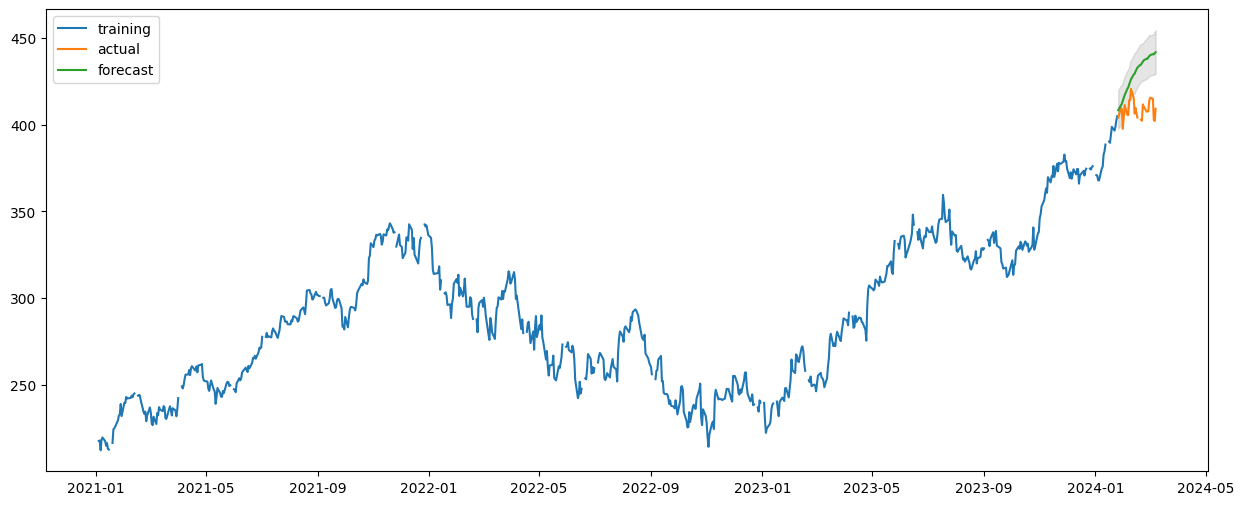

In [125]:
from copy import deepcopy

train_data = stock_data.iloc[:-periods]["Close"]
test_data = stock_data.iloc[-periods:]["Close"]
result = deepcopy(forecast.iloc[-periods:])

fc = tuple(result['yhat'].values) # 예측값
lower_coef = tuple(result['yhat_lower'].values) # 신뢰구간 최소
upper_coef = tuple(result['yhat_upper'].values) # 신뢰구간 최대

# 예측값 인덱스 넣기
fc_data = pd.Series(fc, index = test_data.index)

# 신뢰구간 인덱스 넣기
lower_data = pd.Series(lower_coef, index = test_data.index)
upper_data = pd.Series(upper_coef, index = test_data.index)

#시각화 
plt.figure(figsize =(15, 6))
plt.plot(train_data, label = 'training')
plt.plot(test_data, label = 'actual')
plt.plot(fc_data, label = 'forecast')
plt.fill_between(test_data.index, lower_data, upper_data, color = 'black', alpha = 0.1)
plt.legend(loc = 'upper left')
plt.show()

In [138]:
yhats = forecast["yhat"].values
change_rate = round(((yhats[-1] - yhats[-periods]) / yhats[-periods]) * 100, 2)
change_rate

7.47

In [139]:
yhats[-periods], yhats[-1]

(432.8639005772245, 465.18856680924694)

In [152]:
import requests
import json

base_url = "https://openapi.koreainvestment.com:9443"
url = "/oauth2/Approval"

data = {
  "grant_type": "client_credentials",
  "appkey": "PS5bpfjjD7kD322I9kVDwX6EsLAFNnU8Fw13",
  "secretkey": "6w8UbJ0iQCVyOqsxBvRfc/oayeISa+nUci2KPz2gIm8SduT+c4Og+PY6vn306FD4/6iPbUJa5zet6m/qob569xpjMeVoB8SPxbdmXfH7YuXtkUB5bWFEj391U0DxNDab6Vo4ARF7eq2jh6lDlE+eBrRfrp4WWFbRvJ41RoLM0sqiHJzy2n0="
}

response = requests.post(url=f"{base_url}{url}", data=json.dumps(data))

In [153]:
response.json()

{'approval_key': '6088658b-ea5c-4b67-8268-178a7a55c9d1'}

In [ ]:
import requests
import json

# 웹소켓 접속키 발급
def get_approval(key, secret):
    # url = https://openapivts.koreainvestment.com:29443' # 모의투자계좌     
    url = 'https://openapi.koreainvestment.com:9443' # 실전투자계좌
    headers = {"content-type": "application/json"}
    body = {"grant_type": "client_credentials",
            "appkey": key,
            "secretkey": secret}
    PATH = "oauth2/Approval"
    URL = f"{url}/{PATH}"
    res = requests.post(URL, headers=headers, data=json.dumps(body))
    approval_key = res.json()["approval_key"]
    return approval_key    

g_appkey = "PS5bpfjjD7kD322I9kVDwX6EsLAFNnU8Fw13"
g_appsecret = "6w8UbJ0iQCVyOqsxBvRfc/oayeISa+nUci2KPz2gIm8SduT+c4Og+PY6vn306FD4/6iPbUJa5zet6m/qob569xpjMeVoB8SPxbdmXfH7YuXtkUB5bWFEj391U0DxNDab6Vo4ARF7eq2jh6lDlE+eBrRfrp4WWFbRvJ41RoLM0sqiHJzy2n0="
g_approval_key = get_approval(g_appkey, g_appsecret) 
g_approval_key

In [143]:
response.text

'<meta http-equiv="refresh" content="0;url=http://www.truefriend.com/error/error2.jsp">'